# Conditional Probability, Independence and Bayes Rule

In [1]:
%%html
<link rel="stylesheet" type="text/css" href="../styles/styles.css">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# fixed random seed 
np.random.seed(42)

In [3]:
import sys
from pathlib import Path

# Add the "resources" directory to the path
project_root = Path().resolve().parent.parent
resources_path = project_root / 'resources'
sys.path.insert(0, str(resources_path))

In [4]:
from elementary_probabilities import (solve_ai_doctor_paradox, ai_reliability_example, netflix_conditional_probability, interactive_bayes_explorer)

## Learning Objectives

By the end of this session, you will be able to:
- Calculate conditional probabilities and recognize independence
- Apply Bayes' theorem to real-world problems
- Solve the Monty Hall problem both theoretically and computationally
- Connect conditional probability concepts to machine learning applications

<div class="alert alert-info">
<h4>🎯 The AI Doctor Paradox</h3>
<p><b>Scenario:</b> You're developing an AI system for medical diagnosis. Your system has impressive performance:</p>
<ul>
  <li> 95% accuracy at detecting a rare disease (only 1% of population has it)</li>
  <li> 90% accuracy at correctly identifying healthy patients</li>
</ul>
<p><strong>The Paradox:</strong> Your AI gives a positive diagnosis to a patient. What's the probability they actually have the disease?</p>

<p><b>Your Intuitive Guess:</b></p>
<p>Most people guess: <strong>85-95%</strong> (thinking: "The AI is very accurate!")</p>
<p><strong>Write down your guess before we start:</strong> ______%</p>
<p><em>We'll return to this at the end and see if your intuition was correct...</em></p>
</div>

## Conditional Probability

Let's consider the following use case.

You're Netflix's ML engineer. Your recommendation algorithm shows that:
- 40% of users watch comedies
- 60% of users who watch comedies also watch romantic movies  
- 20% of users who don't watch comedies watch romantic movies

**Question:** If a user watches romantic movies, what's the probability they also watch comedies?

Let's think through this step by step with a visualization:

To do that, let's consider a population of 10,000 users.

Population breakdown:
- 40% of users watch comedies $\rightarrow$ 4,000 watch comedies
- 100 - 40 = 60% of users DO NOT watch comedies  $\rightarrow$ 6,000 DO NOT watch comedies
- 60% of users who watch comedies also watch romantic movies  $\rightarrow$ 0.6 * 4000 = 2400 users watch comedies AND romantic movies
- 20% of users who don't watch comedies watch romantic movies $\rightarrow$ 0.2 * 6000 = 1200 users DO NOT watch comedies AND watch romantic movies

We can represent this information in the following contingency table:

| | &hearts; Romance | X Romance| TOTAL|
|---:|:----:|:---:|:---:|
| **&hearts; Comedy** | $$0.6\times 4000 = 2,400$$| $$4000 - 2400 = 1,600$$| $$4,000$$|
| **X Comedy** | $$0.2\times 6000 = 1,200$$| $$6000 - 1200 = 4,800$$| $$10000 - 4000 = 6,000$$|
| **TOTAL** | $$2400 + 1200 = 3600$$| $$10000 - 3600 = 6400$$ | $$10,000$$|

As we can see, a total number of users who watch romantic movies is $2400 + 1200 = 3,600$ (36% of our population). 

Now, if we want to find the probability a user who watches romantic movies also watches comedies, we can use the ratio: $\frac{2400}{3600} = \frac{2}{3}$

> How to calculate that formally?

Let $A = ``\heartsuit\text{ Romance}"$ and $B = ``\heartsuit\text{ Comedy}"$. An event $``\heartsuit\text{ Romance AND } \heartsuit\text{ Comedy}"$ corresponds to the intersection between two events, i.e. $A \cap B$:

<center>
<img src="img/venn-event-intersection-2.png" alt="Probability of a union vs intersection" width="400px">
</center>

Previously, we saw the treatment of the union and intersection of two events.

Thus, in the case of the union of $A\in \mathcal{A}$ and $B\in \mathcal{A}$ when it concerns the realization of $A$ **or** $B$, we saw that $\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) -  \mathbb{P}(A\cap B)$. We can deduce that $\mathbb{P}(A\cup B) \geq \mathbb{P}(A)$ and $\mathbb{P}(A\cup B)\geq \mathbb{P}(B)$.

However, we have dealt less with the case of intersection. Following intuition, we can say that $\mathbb{P}(A\cap B) < \mathbb{P}(A)$ and $\mathbb{P}(A\cap B) < \mathbb{P}(B)$. What would be the operation on the individual probabilities of $A$ and $B$ that could ensure these conditions, taking into account that $\mathbb{P}(A) \leq 1$ and $\mathbb{P}(B) \leq 1$?

A good candidate is the product. For this, we introduce here the notion of **the probability of $B$ given $A$**, denoted $\mathbb{P}(B|A)$. This can be translated by the fact that the realization of $A$ influences the probability of realization of $B$.

Let's summarize with the diagram below:

<center>
<img src="img/venn-event-union-vs-intersection.png" alt="Probability to test positive" width="800px">
</center>

Getting back to our example: Note that once $A$ is realised (a user watches romantic movies) with $P(A) = \frac{3600}{10000} = 0.36$, the sample space for event $B$ is modified. Indeed, now we can only select from people who watch romantic movies, i.e. 3600 users. Thus, $P(B|A) = \frac{2400}{3600} = \frac{2}{3}$. That's what we were looking for in the question. 

$A\cap B$ corresponds to the cell where a user watches romantic movies and comedies. $P(A\cap B) = \frac{2400}{10000} = 0.24$. 

$$\mathbb{P}(B|A) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(A)} = \frac{0.24}{0.36} = \frac{2400}{3600} = \frac{2}{3}$$

In the case, where a realisation of one event influences a realisation of another we call events $A$ and $B$ **dependent**.

Thus we seek to calculate the probability of realization of an event when part of the information concerning the result is known.

<div class="alert alert-success">
<h4>Definition: Conditional Probability</h4>

Let $(\Omega, \mathcal{A}, \mathbb{P})$ be a probability space, $A\in \mathcal{A}$, $B\in \mathcal{A}$ events, $\mathbb{P}(B)\neq 0$. We call **the probability of $A$ given $B$** the probability defined by:
$$\mathbb{P}(A|B) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$$
If $\mathbb{P}(B) = 0$, we can generalize the definition for the case of events with zero probability, i.e. $\mathbb{P}(A|B) = 0$.

<p><i>Intuition:</i> "What's the probability of A, restricting our attention to cases where B occurred?"</p>

**The conditional probability given $B$** is an application:
$$\mathbb{P}_B : A\in \mathcal{A} \rightarrow \mathbb{P}(A|B)$$
which defines a probability on the event space $(\Omega, \mathcal{A})$.


</div>


<div class="alert alert-success" style='background-color:white'>
<h4>Properties of Conditional Probability<h4>

Here are some properties of conditional probability A given $B$:

1. $\mathbb{P}(\bar{A}|B) = 1 - \mathbb{P}(A|B)$ because we can represent $B$ as $B = (B\cap A) \cup (B\cap \bar{A})$ where $(B\cap A) \cap (B\cap \bar{A}) = \emptyset$

<center>

<center>
<img src="img/venn-diagram-union-b-a-complement.png" alt="Probability not A given B" width="400px">
</center>

2. $\mathbb{P}(A\cap B) = \mathbb{P}(A|B)\times \mathbb{P}(B) = \mathbb{P}(B|A)\times \mathbb{P}(A)$

</div>

In [5]:
# demo
netflix_conditional_probability()

Netflix User Analysis (10,000 users):
Watches Romantic   0.0   1.0    All
Watches Comedy                     
0                 4865  1243   6108
1                 1593  2299   3892
All               6458  3542  10000

Conditional Probabilities:
P(Romantic | Comedy) = 0.591 (≈ 0.600)
P(Comedy | Romantic) = 0.649
P(Comedy) = 0.389 (≈ 0.400)
P(Romantic) = 0.354


np.float64(0.6490683229813664)

<div class="alert alert-warning">
<h4>💡 Key Insight: Conditional probabilities are NOT symmetric!</h4>

<p>P(A|B) ≠ P(B|A) in general</p>

</div>

In our Netflix example:

- $P(Romantic | Comedy) ≈ 0.60$
- $P(Comedy | Romantic) ≈ 0.67$


## Independence

Now let's consider a coin toss. Let $A = ``\text{obtaining heads when tossing a coin}"$ and $B = ``\text{obtaining tails when tossing a coin}"$.

$\mathbb{P}(A) = 1/2$. Note that the realization of $A$ in this case does not influence the realization of $B$. So $\mathbb{P}(B|A) = \mathbb{P}(B) = 1/2$.

We speak of **independent** events.

<div class="alert alert-success">
<h4>Definition: Independent Events</h4>

Let $(\Omega, \mathcal{A}, \mathbb{P})$ be a probability space, $A, B \in \mathcal{A}$ two events. $A$ and $B$ are called **independent**, if:
$$\mathbb{P}(A\cap B) = \mathbb{P}(A)\times \mathbb{P}(B)$$
Using the notion of conditional probability, we can consider that $A$ and $B$ such that $\mathbb{P}(B)\neq 0$ are independent if:
$$\mathbb{P}(A|B) = \mathbb{P}(A)$$

<p><i>Intuition:</i> "Learning that B occurred doesn't change our belief about A"</p>

</div>

Note that if events $A$ and $B$ are independent, then the following pairs of events are independent:

* $A$ and $\bar{B}$
* $\bar{A}$ and $B$
* $\bar{A}$ and $\bar{B}$

<div class="alert alert-success">
<h4>Definition: Mutually Independent Events</h4>

The events $A_1, ..., A_n\in \mathcal{A}$ in the probability space $(\Omega, \mathcal{A}, \mathbb{P})$ are **mutually independent**, if $\forall k\in \{1,...,n\}$ and $\forall (i_1,...,i_k) \in \mathbb{N}^k$ such that $1\leq i_1 \leq i_2\leq ...\leq i_k \leq n$, we have:
$$\mathbb{P}(A_{i_1} \cap ... \cap A_{i_k} ) = \mathbb{P}(A_{i_1})\times ... \times \mathbb{P}(A_{i_k}) $$


</div>

Note that for the case of 3 events $A, B, C \in \mathcal{A}$, the following conditions must be satisfied:

1. pairwise independence:

* $\mathbb{P}(A \cap B) = \mathbb{P}(A)\times \mathbb{P}(B)$
* $\mathbb{P}(A \cap C) = \mathbb{P}(A)\times \mathbb{P}(C)$
* $\mathbb{P}(B \cap C) = \mathbb{P}(B)\times \mathbb{P}(C)$

2. $\mathbb{P}(A \cap B \cap C) = \mathbb{P}(A)\times \mathbb{P}(B) \times \mathbb{P}(C)$

*Remark*: events can be pairwise independent without being mutually independent.

<div class="alert alert-exercise">
<h4>Calculation Example: Independence</h4>

The probability of event $A$ is $\mathbb{P}(A) = 0.8$, the probability of event $C$ is $\mathbb{P}(C) = 0.35$ and the probability $\mathbb{P}(A\cap C) = 0.28$. Are events $A$ and $C$ independent?

</div>

<details>
<summary>Reveal solution</summary>
Events $A$ and $C$ are independent if $\mathbb{P}(A\cap C) = \mathbb{P}(A)\times \mathbb{P}(C)$.

We know $\mathbb{P}(A\cap C) = 0.28$. It remains to calculate the product:
$\mathbb{P}(A)\times \mathbb{P}(C) = 0.8\times 0.35 = 0.28$.

Therefore, we have verified that $0.28 = \mathbb{P}(A\cap C) = \mathbb{P}(A)\times \mathbb{P}(C) = 0.8\times 0.35 = 0.28$. So, events $A$ and $C$ are independent.
</details>

<div class="alert alert-exercise">
<h4>Calculation Example: Birthday on the Same Day</h4>

If your birthday is February 2, what is the probability that your 2 friends have their birthday on the same day?
</div>

<details>
<summary>Reveal solution</summary>

Let's define events $A$ and $B$ as follows:

$A = ``\text{one friend's birthday is February 2}"$ **and** $B = ``\text{another friend's birthday is February 2}"$.
We are looking for the probability $\mathbb{P}(A\cap B)$.

We know that $\mathbb{P}(A\cap B) = \mathbb{P}(A)\times \mathbb{P}(B|A)$. The question that arises is therefore: are events $A$ and $B$ independent? in other words, does the realization of $A$ influence the realization of $B$?

In the general case, the birth of one friend on a particular day does not influence the birth day of another friend. Then, $\mathbb{P}(B|A) = \mathbb{P}(B)$.

Let's find the probabilities of $A$ and $B$, considering that a year contains 365 days:

* $\mathbb{P}(A) = \frac{1}{365}$
* $\mathbb{P}(B) = \frac{1}{365}$

Let's return to the formula:

$\mathbb{P}(A\cap B) = \mathbb{P}(A)\times \mathbb{P}(B|A) = \mathbb{P}(A)\times \mathbb{P}(B) = \frac{1}{365}\times \frac{1}{365} = \mathbf{\frac{1}{365^2}}$
</details>

<div class="alert alert-exercise">
<h4>Calculation Example: Autonomous Vehicle Reliability Analysis</h4>

You're a safety engineer evaluating an autonomous vehicle (AV) AI system before deployment. The vehicle has 6 critical subsystems that must all function correctly for safe operation:

- Camera system: reliability = 0.995
- LiDAR sensor: reliability = 0.998
- Radar system: reliability = 0.997
- AI processor: reliability = 0.999
- Decision engine: reliability = 0.993
- Communication module: reliability = 0.990

Questions:
1. What is the probability that ALL systems function correctly (overall system reliability)?
2. What is the probability of at least one system failure?
3. Which component, if perfected (reliability = 1.0), would provide the greatest improvement to overall system reliability?
4. If the vehicle operates 10,000 hours per year, how many hours of system failure should you expect?
5. Is this system safe enough for deployment if the industry standard requires 99.9% reliability?

</div>

<details>
<summary>Reveal solution</summary>

1. Overall System Reliability

Since the AV requires ALL subsystems to work (series system), we multiply the individual reliabilities:
$$P(\text{all systems work}) = P(camera) \times P(LiDAR) \times P(radar) \times P(AI) \times P(decision) \times P(comm) = $$

$$= 0.995 \times 0.998 \times 0.997 \times 0.999 \times 0.993 \times 0.990 = 0.9723$$

The overall system reliability is approximately 97.23%

2. Probability of System Failure

Using the complement rule:
$$P(\text{at least one failure}) = 1 - P(\text{all systems work}) = 1 - 0.9723 = 0.0277$$

There's a 2.78% probability of at least one system failing.

3. Critical Component Analysis

To find which component matters most, calculate the improvement if each were perfected:

Original failure rate: $1 - 0.9723 = 0.0277$

For each component, temporarily set its reliability to 1.0:

|Component| New System Reliability| Improvement|
|---|-----|----|
|Camera (0.995→1.0)|$\mathbf{1.0} \times 0.998 \times 0.997 \times 0.999 \times 0.993 \times 0.990 = 0.9772$| $0.9772 - 0.9723 = 0.0049$|
| LiDAR (0.998→1.0) | $0.995 \times \mathbf{1.0} \times 0.997 \times 0.999 \times 0.993 \times 0.990= 0.9742$ | $0.9742 - 0.9723 = 0.0019$|
| Radar (0.997→1.0) | $0.995 \times 0.998 \times \mathbf{1.0} \times 0.999 \times 0.993 \times 0.990 = 0.9752$ | $0.9752 - 0.9723 = 0.0029$|
| AI (0.999→1.0) | $0.995 \times 0.998 \times 0.997 \times \mathbf{1.0} \times 0.993 \times 0.990 = 0.9733$ | $0.9733 - 0.9723 = 0.0010$|
| Decision (0.993→1.0) | $0.995 \times 0.998 \times 0.997 \times 0.999 \times \mathbf{1.0} \times 0.990 = 0.9792$ | $0.9792 - 0.9723 = 0.0069$|
| Comm (0.990→1.0) | $0.995 \times 0.998 \times 0.997 \times 0.999 \times 0.993 \times \mathbf{1.0} = 0.9821$ | $0.9821 - 0.9723 = \mathbf{0.0098}$|

The communication module is the most critical component. Perfecting it would improve system reliability by 0.98 percentage points (from 97.23% to 98.21%).

4. Expected Failure Hours Per Year

$$\text{Expected failure time} = \text{Operating hours} \times \text{Failure probability} = 10000\times 0.0277 = 277\text{ hours per year} \approx 23.08\text{ hours per month}$$

Expect approximately 277 hours of system failure per year (about 23 hours/month or 0.76 hours/day).

5. Safety Assessment

- Industry standard: 99.9% reliability (0.1% failure rate)
- Our system: 97.23% reliability (2.77& failure rate)

$$Gap = 99.9 - 97.23 = 2.67\%$$

NO, the system does NOT meet safety standards. The system has approximately 28 times more failures than acceptable. This is a critical safety gap. The system would fail almost 30 times more often than industry standards permit.

</details>

🚗 AUTONOMOUS VEHICLE RELIABILITY ANALYSIS

System failure probability: 0.027704 (2.7704%)
System reliability: 0.972296 (97.2296%)

🔍 Critical Component Analysis:
   communication: 0.009821 improvement if perfected
   decision_engine: 0.006854 improvement if perfected
   camera_system: 0.004886 improvement if perfected
   radar_system: 0.002926 improvement if perfected
   lidar_sensor: 0.001948 improvement if perfected
   ai_processor: 0.000973 improvement if perfected
The most critical component: ['communication']

Failure Time:
Expected failure time: 277.04h per year (23.09h per month or 0.76h per day)

Safety Assessment:
NO, the system does NOT meet safety standards


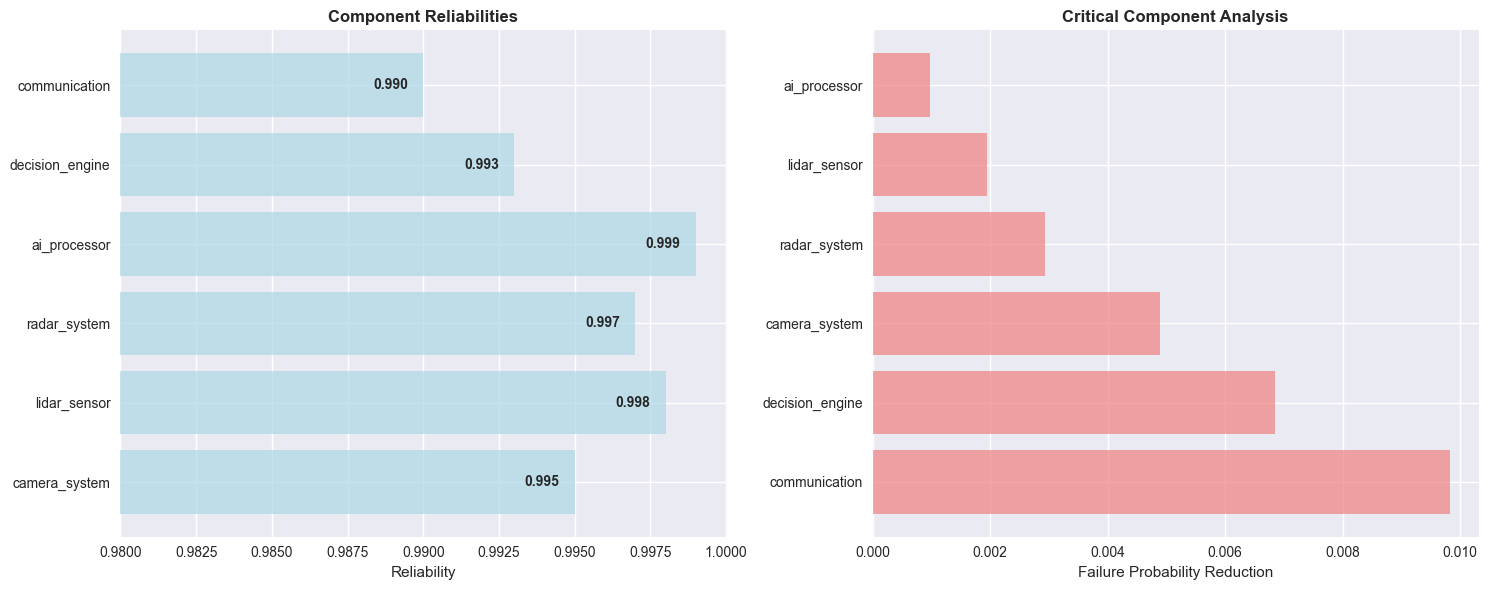

In [6]:
# demo
ai_reliability_example()

## Law of Total Probability

Let's consider the following example (the data is imaginary).

A country's energy production is based on 3 main sources. Nuclear produces 60% of the energy, fossil fuels 30%, and renewable energy constitutes 10%. In the first case, the production process is completely functional 95% of the time, in the 2nd case 80% of the time, and in the 3rd case 65% of the time. What is the probability that by signing the contract, you will not have any interruption?

Let's denote by $B_1, B_2, B_3$ the energy sources: nuclear, fossil fuels, and renewable energy, respectively. The probabilities of $B_1, B_2, B_3$ are then given according to the statement by $\mathbb{P}(B_1) = 0.6$, $\mathbb{P}(B_2) = 0.3$, $\mathbb{P}(B_3) = 0.1$. Let's denote by $A$ the event $``\text{contract with uninterrupted service}"$

Let's approach this problem using a probability tree.

<center>
<img src="img/bayes-1.png" alt="Probability tree of three energy sources" width="800px">
</center>

Knowing the energy source for a contract, we know the probabilities of proper functioning. Let's add this information to the diagram:

<center>
<img src="img/bayes-2.png" alt="Probability tree of three energy sources and proper functioning" width="800px">
</center>

The second part of this tree corresponds to the probabilities of $A$ given $B_i, i=1,2,3$.

<center>
<img src="img/bayes-3.png" alt="Probability tree of three energy sources and proper functioning. Conditional probabilities" width="800px">
</center>

Thus, $\mathbb{P}(A|B_1) = 0.95$, $\mathbb{P}(A|B_2) = 0.8$, $\mathbb{P}(A|B_3) = 0.65$.

Notice that there are 3 different paths to reach $A$:

<center>
<img src="img/bayes-4.png" alt="Three paths to reach A" width="800px">
</center>

So, to answer the question in the statement, we must calculate $\mathbb{P}(A)$. For this, we will use all these paths, i.e.:
$$\mathbb{P}(A) = \mathbb{P}(B_1)\cdot\mathbb{P}(A|B_1) + \mathbb{P}(B_2)\cdot\mathbb{P}(A|B_2) + \mathbb{P}(B_3)\cdot\mathbb{P}(A|B_3) =$$

$$= 0.6\times 0.95 + 0.3\times 0.8 + 0.1\times 0.65 = 0.57+0.24+0.065 = 0.875$$

<div class="alert alert-success">
<h4>Definition: Law of Total Probability</h4>

Let $(\Omega, \mathcal{A}, \mathbb{P})$ be a probability space. Let $B_1, B_2, ..., B_n$ be an exhaustive system of events (partition of $\Omega$) such that $\bigcup_{i=1}^n B_i = \Omega$ and $\forall (i,j)\in \{1,...,n\}^2, i\neq j, B_i \cap B_j = \emptyset$. Let $\forall i=\overline{1,n}, \mathbb{P}(B_i)\neq 0$, then
the total probability of event $A \in \mathcal{A}$ is given by:
$$\mathbb{P}(A) = \sum_{i=1}^n\mathbb{P}(A|B_i)\cdot \mathbb{P}(B_i) = \sum_{i=1}^n\mathbb{P}(A\cap B_i)$$


</div>

## Bayes' Rule

Returning to the same example, imagine that now we are interested in the probability of a particular energy source given that $A$ has been realized, in other words, we would like to find $\mathbb{P}(B_i|A), i=1,2,3$.

We have seen that the conditional probability of $A$ given $B$ is given by: $\mathbb{P}(A|B) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$. Then, $\mathbb{P}(A\cap B) = \mathbb{P}(A|B)\times \mathbb{P}(B)$.

Let's consider two conditional probabilities:

1. $\mathbb{P}(A|B) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)} \Rightarrow \mathbb{P}(A\cap B) = \mathbb{P}(A|B)\times \mathbb{P}(B)$
2. $\mathbb{P}(B|A) = \frac{\mathbb{P}(B\cap A)}{\mathbb{P}(A)}$

Let's replace $\mathbb{P}(B\cap A)$ with the expression $\mathbb{P}(B\cap A) = \mathbb{P}(A|B)\times \mathbb{P}(B)$ in the second expression. We obtain:

$$\mathbb{P}(B|A) = \frac{\mathbb{P}(B\cap A)}{\mathbb{P}(A)} = \frac{\mathbb{P}(A|B)\times \mathbb{P}(B)}{\mathbb{P}(A)}$$

We call this formula **Bayes' theorem** or **Bayes' rule**.

<div class="alert alert-success">
<h4>Definition: Bayes' Rule</h4>

Let $(\Omega, \mathcal{A}, \mathbb{P})$ be a probability space. Let $B_1, B_2, ..., B_n$ be an exhaustive system of events (partition of $\Omega$) such that $\bigcup_{i=1}^n B_i = \Omega$ and $\forall (i,j)\in \{1,...,n\}^2, i\neq j, B_i \cap B_j = \emptyset$. Let $\forall i=\overline{1,n}, \mathbb{P}(B_i)\neq 0$. Then:

$$\forall A\in \mathcal{A}:\ \ \mathbb{P}(B_k|A) = \frac{\mathbb{P}(A|B_k)\times \mathbb{P}(B_k)}{\sum_{i=1}^n \mathbb{P}(A|B_i)\times \mathbb{P}(B_i)} = \frac{\mathbb{P}(A|B_k)\times \mathbb{P}(B_k)}{\mathbb{P}(A)}$$

**Components:**
- $\mathbb{P}(B_k|A)$: Posterior - what we want to find
- $\mathbb{P}(A|B)$: Likelihood - how likely is evidence given hypothesis
- $\mathbb{P}(B)$: Prior - our initial belief
- $\mathbb{P}(A)$: Evidence - probability of observing the data 

</div>

## ML Applications

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight</h4>
<p><strong>Where you'll use conditional probabilities:</strong> Every classification algorithm!</p>
<p><strong>Examples:</strong></p>
<ul>
  <li><strong>Email Classification:</strong> P(Spam | contains "free") vs P(contains "free" | Spam)</li>
  <li><strong>Image Recognition:</strong> P(Dog | pixel_pattern) vs P(pixel_pattern | Dog)</li>
  <li><strong>Medical AI:</strong> P(Disease | symptoms) vs P(symptoms | Disease)</li>
</ul>
</div>

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight</h4>
<p><strong>Naive Bayes Classifier:</strong> Assumes features are independent!</p>
<p><strong>Example:</strong> Email spam detection</p>
<ul>
  <li>Assumes "contains 'free'" and "contains 'money'" are independent</li>
  <li>This assumption is often wrong, but the algorithm still works well!</li>
  <li>That's why it's called "naive"</li>
</ul>
<p><strong>When assumption fails:</strong> More sophisticated models needed (e.g., neural networks)</p>
</div>

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight: Model Calibration</h4>
<p><b>Problem:</b> An AI model says "90% confident" but is only correct 60% of the time!</p>
<p><b>Solution:</b> Probability calibration ensures P(correct | "90% confident") ≈ 0.9</p>
<p><b>Methods:</b></p>
<ul>
<li><b>Platt Scaling:</b> Use logistic regression to map raw scores to probabilities</li>
<li><b>Temperature Scaling:</b> Divide logits by temperature T before softmax</li>
<li><b>Reliability Diagrams:</b> Plot predicted vs actual probability</li>
</ul>
<p><b>Why It Matters:</b> Miscalibrated probabilities in medical AI could be life-threatening!</p>
</div>

## Return to Opening Challenge

Let's resume the given information:
- disease rate: 0.01 (*1% of population has disease*)
- sensitivity: 0.95 (*95% accuracy detecting disease*)
- specificity: 0.90 (*90% accuracy identifying healthy patients*)

> Is your intuition correct?

Before calculating using Bayes' rule, let's analyze a population of 10,000 patients:

*Population Breakdown:*
- Diseased Patients (1%):

Total diseased: 10,000 × 0.01 = 100 patients

    * True Positives (test correctly identifies disease): 100 × 0.95 = 95 patients
    * False Negatives (test misses disease): 100 × 0.05 = 5 patients

- Healthy Patients (99%):

Total healthy: 10,000 × 0.99 = 9,900 patients

    * True Negatives (test correctly says healthy): 9,900 × 0.90 = 8,910 patients
    * False Positives (test incorrectly says diseased): 9,900 × 0.10 = 990 patients

*Among All Positive Tests:*

Total positive tests = True Positives + False Positives

Total positive tests = 95 + 990 = 1,085 tests

Of these 1,085 positive tests:

- Actually diseased: 95 patients (8.75%)
- Actually healthy: 990 patients (91.25%)

||Actually Diseased | Actually Healthy | Total |
|--|:----:|:---:|---|
| **Test Positive** | 95 | **990** | 1085 |
| **Test Negative** | 5 | 8,910 | 8,915|
| **Total** | 100 | 9,900 | 10,000 |

> How to calculate using Bayes' rule?

Let's define our events:

- $D = ``\text{patient has the disease"}$
- $D' = ``\text{patient DOES NOT have the disease"}$
- $T = ``\text{test result is positive"}$
- $T' = ``\text{test result is negative"}$

Let's translate given  information into probability notation:
1. Disease prevalence (Prior Probability):
- $P(D) = 0.01$ (*1% of population has disease*)
- $P(D') = 1- P(D) = 1 - 0.01 = 0.99$ (*99% of population is healthy*)

2. Test sensitivity (True Positive Rate):
$P(T | D) = 0.95$ (*95% accuracy detecting disease*)

Meaning: *If a patient HAS the disease, there's a 95% chance the test correctly says "positive"*

3. Test specificity (True Negative Rate):
$P(T' | D') = 0.90$ (*90% accuracy identifying healthy patients*)

Meaning: *If a patient is HEALTHY, there's a 90% chance the test correctly says "negative"*

4. False Positive Rate (derived from specificity):
$P(T | D') = 1 - P(T' | D') = 1 - 0.90 = 0.10$

Meaning: *If a patient is HEALTHY, there's a 10% chance the test incorrectly says "positive"*

**What we want to find:** 

Probability patient has disease GIVEN that test is positive, i.e. $P(D | T)$

To find that, we can apply Bayes' Rule.

Bayes' theorem tells us:

$$P(D | T) = \frac{P(T | D) \times P(D)}{P(T)} = \frac{0.95 \times 0.01}{\mathbf{???}}$$

We need to find $P(T)$. To do so, we can use the Law of Total Probability:

A patient can test positive in two ways:

- They have the disease AND test positive
- They're healthy AND test positive (false positive)

<center>
<img src="img/bayes-doctor.png" alt="Probability to test positive" width="400px">
</center>

Hence:

$$P(T) = P(D) \times P(T | D) + P(D') \times P(T | D') = 0.01 \times 0.95 + 0.99 \times 0.1 = 0.0095 + 0.099 = 0.1085$$

which means that about 10.85% of all patients will test positive.

Back to Bayes' theorem:

$$P(D | T) = \frac{P(T | D) \times P(D)}{P(T)} = \frac{0.95 \times 0.01}{\mathbf{0.1085}} = 0.0876$$

**Even with a 95% accurate test, a positive result only indicates an 8.76% chance the patient actually has the disease!**


In [7]:
# demonstration
solve_ai_doctor_paradox()

🎯 AI Doctor Paradox - SOLUTION
Given:
- Disease prevalence: 1.0%
- Healthy population rate: 0.99
- AI sensitivity (accuracy detecting disease, True Positive Rate): 95%
- AI specificity (accuracy identifying healthy patients, True Negative Rate): 90%
- False Positive Rate): 10%

Solution using Bayes' Theorem:
P(Disease | Positive Test) = 0.088 = 8.8%

🤯 SHOCKING RESULT:
Even with 95% accuracy, a positive test only indicates
an 8.8% chance the patient has the disease!

Why intuition fails:
- Base rate is very low (1%)
- Many false positives from healthy patients
- False positives outnumber true positives!


0.08755760368663597

<div class="alert .alert-warning">
<h4>💡 Key Insight: Base Rate Fallacy</h4>

1. Low Prevalence Dominates:

Even though only 10% of healthy people get false positives, there are SO MANY healthy people (9,900) that false positives (990) vastly outnumber true positives (95)


2. The Mathematics:

- False positives: 990 patients
- True positives: 95 patients
- Ratio: 990/95 ≈ 10.4 false positives for every true positive!


3. The Intuition Trap:

- We focus on test accuracy (95%) and ignore base rate (1%)
- Our brains aren't wired to intuitively handle these rare event probabilities
</div>

In [ ]:
# interactive visualisation
interactive_bayes_explorer()

interactive(children=(FloatSlider(value=0.01, description='Disease Rate', max=0.1, min=0.001, step=0.001), Flo…

🎮 Interactive Bayes' Theorem Explorer:
Try different parameter values to see how they affect the posterior probability!


## Common Mistakes

<div class="alert alert-danger">
<h4>⚠️ Common Pitfalls to Avoid:</h4>
<ul>
  <li><strong>Confusing P(A|B) with P(B|A)</strong> - they're usually different!</li>
  <li><strong>Assuming independence without testing</strong> - check your assumptions</li>
  <li><strong>Ignoring base rates</strong> - prior probabilities matter enormously</li>
  <li><strong>Misinterpreting test results</strong> - always consider false positives/negatives</li>
</ul>
</div>

## Applications in Machine Learning

<div class="alert alert-secondary">
<h4>🤖 ML Applications Summary</h4>
<ul>
  <li><strong>Naive Bayes:</strong> Text classification, spam detection, sentiment analysis</li>
  <li><strong>Medical AI:</strong> Diagnostic systems with uncertainty quantification</li>
  <li><strong>A/B Testing:</strong> Statistical significance of model improvements</li>
  <li><strong>Recommender Systems:</strong> Updating user preferences based on behavior</li>
  <li><strong>Fraud Detection:</strong> Risk assessment with conditional probabilities</li>
</ul>
</div>

## Key Takeaways

<div class="alert alert-summary">
<h4>📋 Key Takeaways</h4>
<ol>
<li><strong>Conditional Probability:</strong> P(A|B) = P(A∩B) / P(B) - updating beliefs with new information</li>
  <li><strong>Independence:</strong> P(A|B) = P(A) - events don't influence each other</li>
  <li><strong>Bayes' Theorem:</strong> P(A|B) = P(B|A) × P(A)/P(B) - the foundation of AI classification</li>
  <li><strong>Base Rate Fallacy:</strong> Ignoring prior probabilities leads to wrong conclusions</li>
  <li><strong>Law of Total Probability</strong>: P(B) = Σ P(B|Aᵢ) × P(Aᵢ)</li>

</ol>
</div>

## Useful Links

1. Jeremy Orloff, and Jonathan Bloom. *18.05 Introduction to Probability and Statistics*. Spring 2014. Massachusetts Institute of Technology: MIT OpenCourseWare, [https://ocw.mit.edu](https://ocw.mit.edu). License: Creative Commons BY-NC-SA.
2. Stéphane Balac, and Olivier Mazet. *Introduction aux Probabilités*. Centre de Mathématiques. Institut National des Sciences Appliquées de Lyon, [https://perso.univ-rennes1.fr/stephane.balac/publis/polypbs.pdf](https://perso.univ-rennes1.fr/stephane.balac/publis/polypbs.pdf)
3. MathTutor. *Conditional Probability Tutorial*. [https://www.youtube.com/watch?v=rp9I0x0jqHo](https://www.youtube.com/watch?v=rp9I0x0jqHo)